In [1]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
outpath='HAT-264-0001158.rlc.tfalc'
data=Table.read(outpath,format='ascii')
t=data['col2']
mag=data['col8']

Text(0.5, 0, 'time (BJD-2454833)')

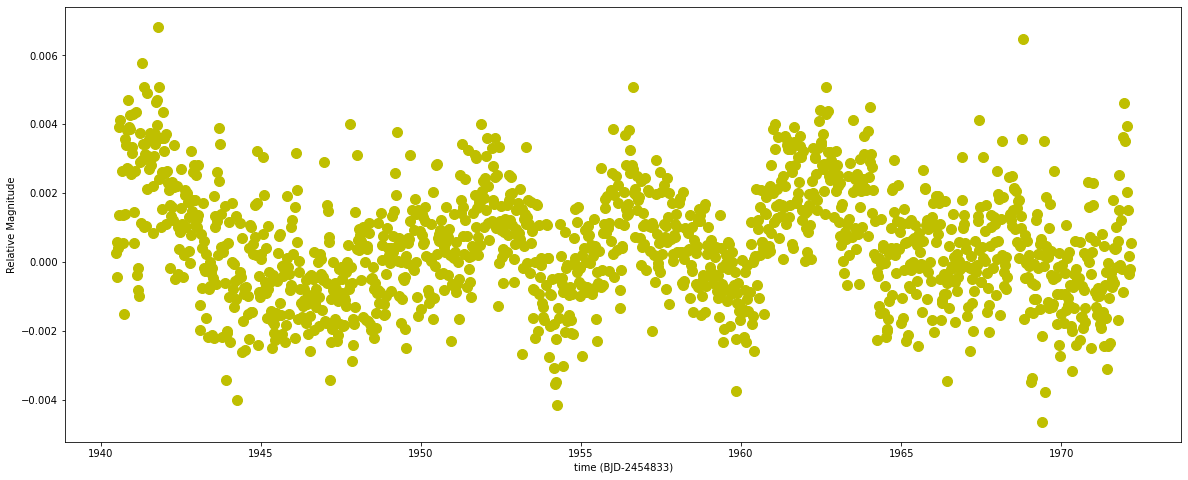

In [3]:
plt.figure(figsize=(20,8))
plt.plot(t,mag,'yo',markersize=10,label='HAT-264-0001158')
plt.ylabel('Relative Magnitude')
plt.xlabel('time (BJD-2454833)')

In [4]:
import astrobase
from astrobase import periodbase, checkplot
periodbase.use_astropy_bls()

[I 200819 11:40:27 __init__:84] An Astropy implementation of BLS is available because Astropy >= 3.1.
[I 200819 11:40:27 __init__:86] If you want to use it as the default periodbase BLS runner, call the periodbase.use_astropy_bls() function.


In [5]:
dates=data['col2']
fluxes=data['col8']
errs=fluxes*0.01

In [6]:
glsp = periodbase.pgen_lsp(dates,fluxes,errs)

[I 200819 11:40:27 zgls:597] using autofreq with 1580 frequency points, start P = 0.100, end P = 31.690
[I 200819 11:40:27 zgls:607] using 6 workers...


In [7]:
cp = checkplot.checkplot_png(glsp, dates, fluxes, errs)

[I 200819 11:40:30 nonphysical:216] spline fit done. nknots = 13,  chisq = 13548210.53406, reduced chisq = 9932.70567
[I 200819 11:40:30 png:696] plotting phased LC with period 5.463718, epoch 1967.79472
[I 200819 11:40:30 nonphysical:216] spline fit done. nknots = 13,  chisq = 13649763.49752, reduced chisq = 10007.15799
[I 200819 11:40:30 png:696] plotting phased LC with period 2.731859, epoch 1967.79472
[I 200819 11:40:30 nonphysical:216] spline fit done. nknots = 13,  chisq = 13465043.68822, reduced chisq = 9871.73291
[I 200819 11:40:30 png:696] plotting phased LC with period 10.927436, epoch 1962.31900
[I 200819 11:40:30 nonphysical:216] spline fit done. nknots = 13,  chisq = 13518127.57564, reduced chisq = 9910.65072
[I 200819 11:40:30 png:696] plotting phased LC with period 0.415874, epoch 1940.47757
[I 200819 11:40:30 nonphysical:216] spline fit done. nknots = 13,  chisq = 13487867.97212, reduced chisq = 9888.46626
[I 200819 11:40:30 png:696] plotting phased LC with period 0.195

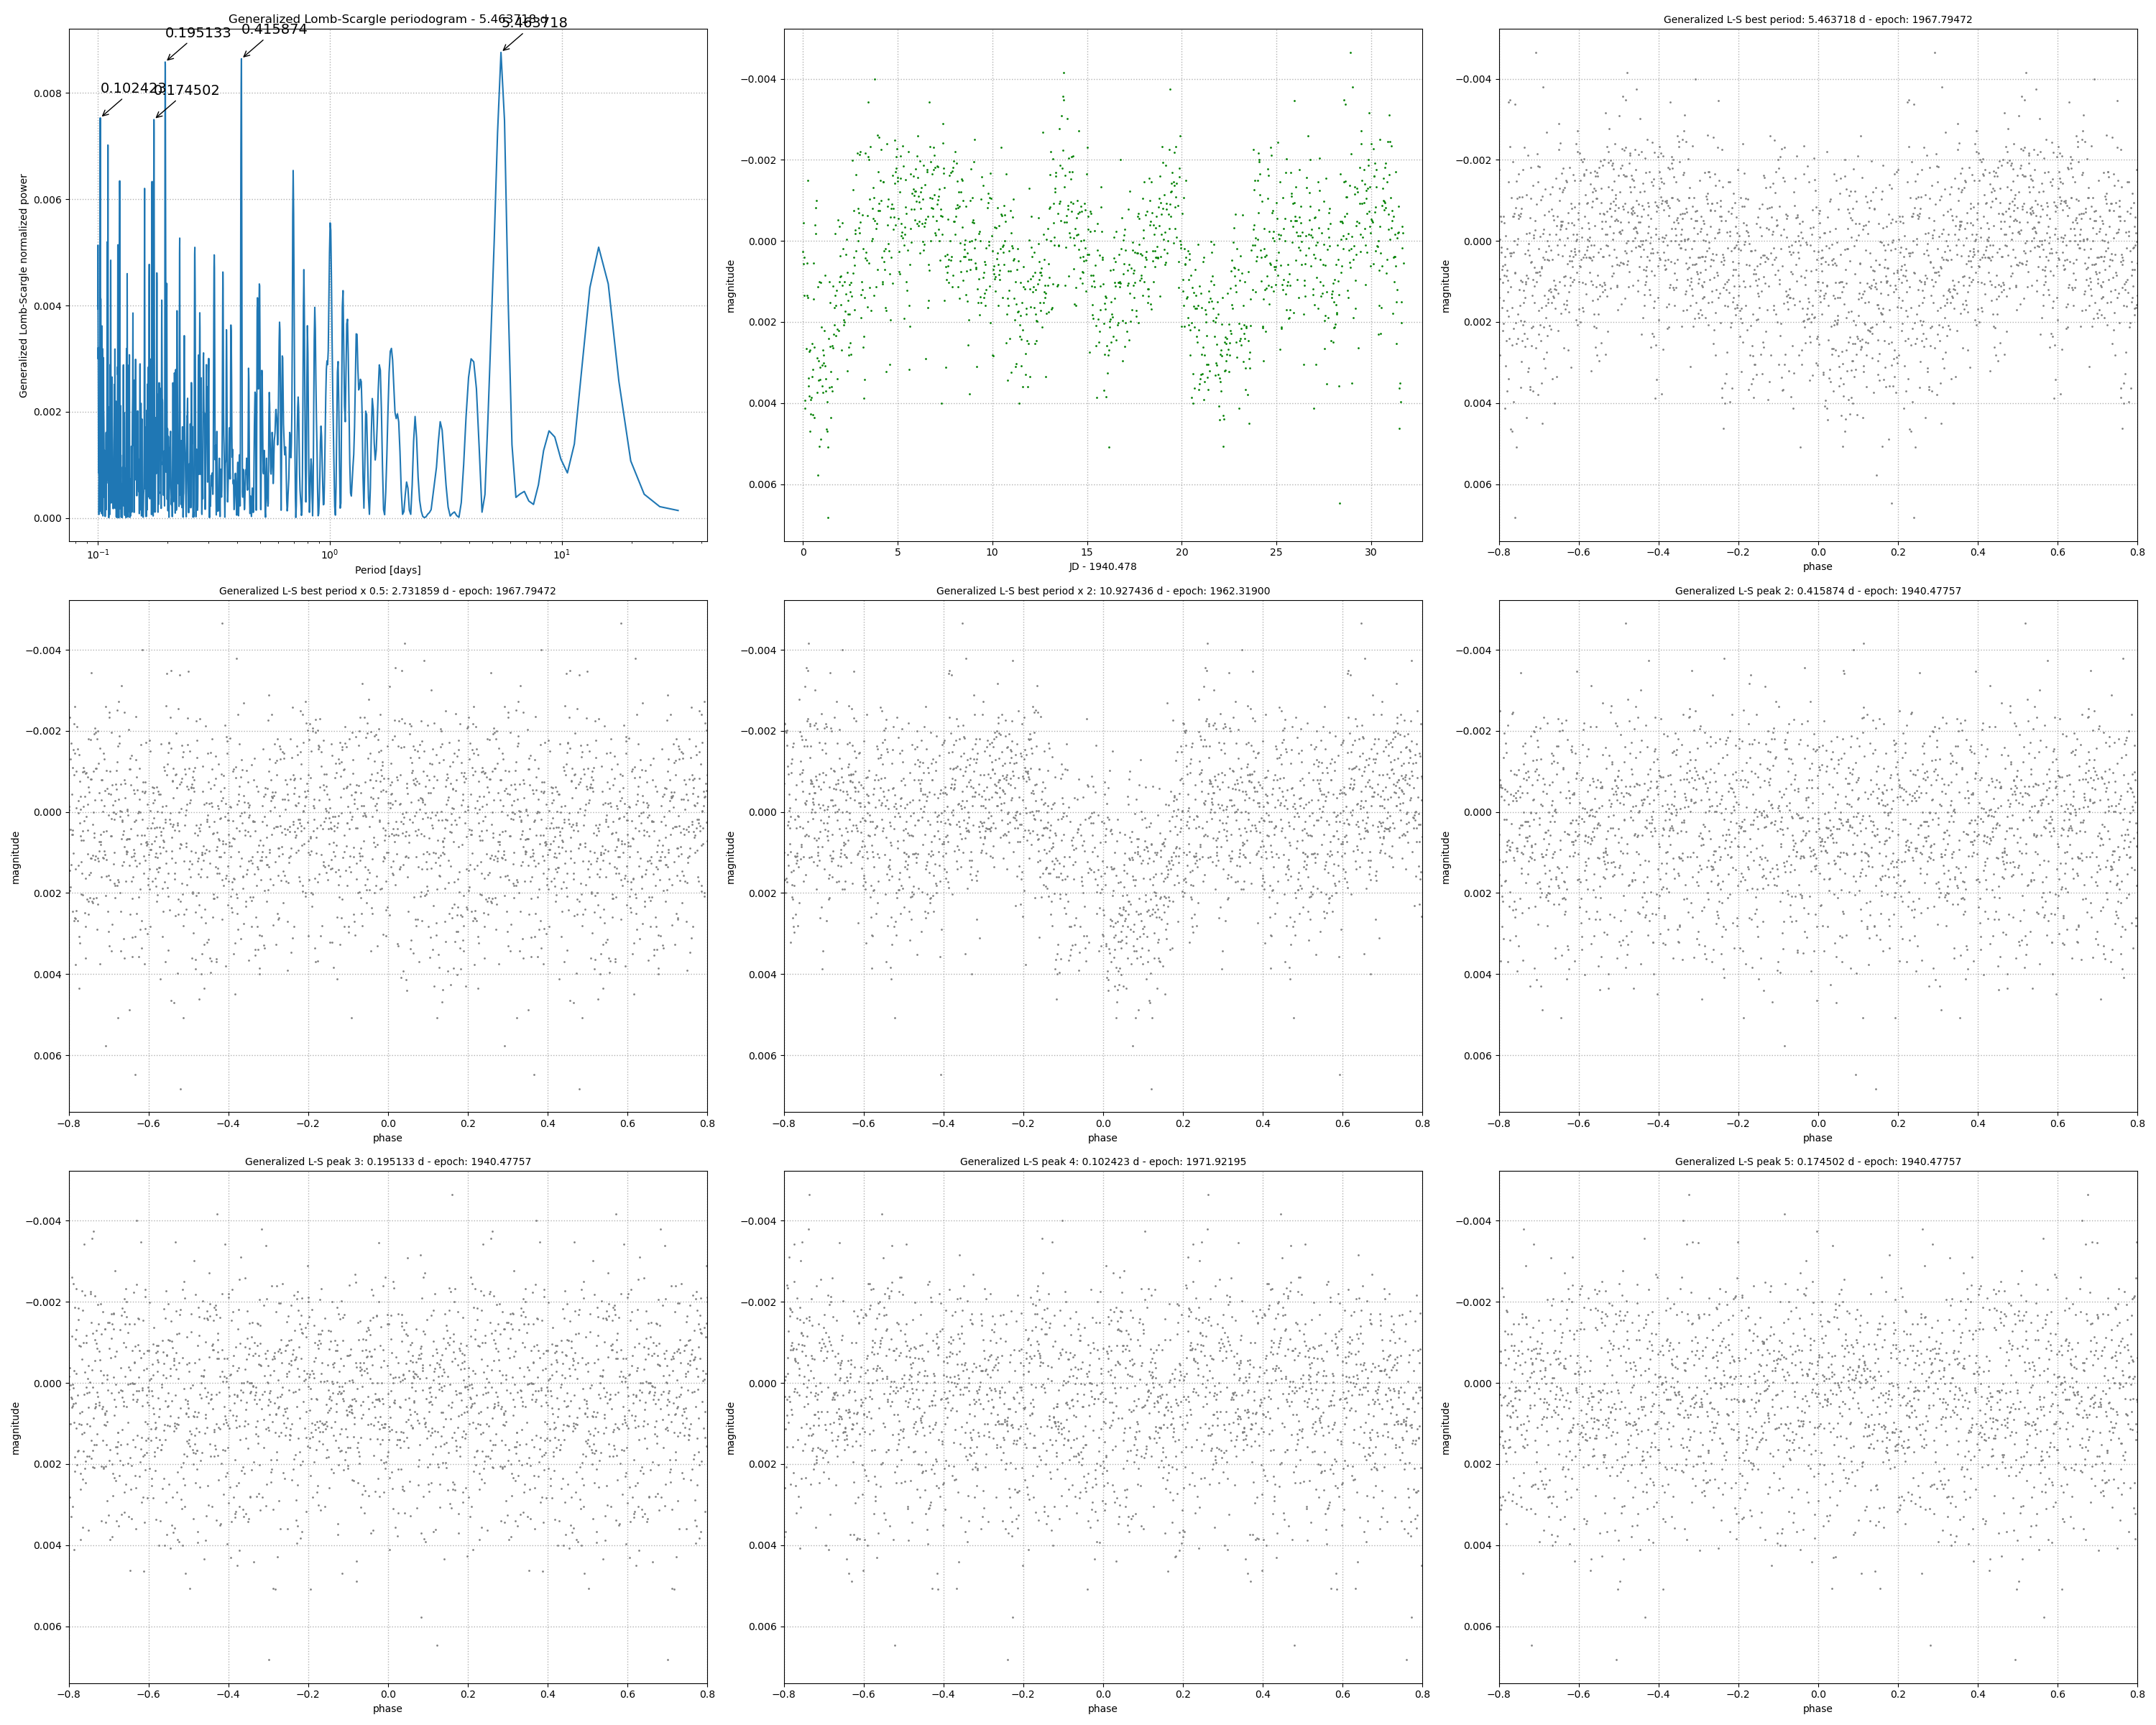

In [8]:
from IPython.display import Image
Image('0001158-checkplot-glsp.png')

In [9]:
glsp

{'bestperiod': 5.463717960344835,
 'bestlspval': 0.008765718965553162,
 'nbestpeaks': 5,
 'nbestlspvals': [0.008765718965553162,
  0.008644222240818766,
  0.008583580809174157,
  0.007532007430291447,
  0.007500187730826028],
 'nbestperiods': [5.463717960344835,
  0.41587354553805833,
  0.1951327842980298,
  0.10242263791208803,
  0.1745020053414099],
 'lspvals': array([0.0001404 , 0.00021332, 0.00044681, ..., 0.00513498, 0.00510643,
        0.00393332]),
 'omegas': array([ 0.19827301,  0.23792761,  0.27758222, ..., 62.7335807 ,
        62.7732353 , 62.8128899 ]),
 'periods': array([31.68956417, 26.40797014, 22.63540298, ...,  0.10015665,
         0.10009338,  0.10003019]),
 'method': 'gls',
 'kwargs': {'startp': None,
  'endp': None,
  'stepsize': 0.0001,
  'autofreq': True,
  'periodepsilon': 0.1,
  'nbestpeaks': 5,
  'sigclip': 10.0}}

In [10]:
print('LS algorithm:',(glsp['nbestperiods']),'(days)')

LS algorithm: [5.463717960344835, 0.41587354553805833, 0.1951327842980298, 0.10242263791208803, 0.1745020053414099] (days)


In [11]:
bls=periodbase.bls_parallel_pfind(dates,fluxes,errs)

[I 200819 11:40:32 abls:919] min P: 0.1, max P: 100.0, nfreq: 126632, minfreq: 0.01, maxfreq: 10.0
[I 200819 11:40:32 abls:922] autofreq = True: using AUTOMATIC values for freq stepsize: 7.889032447996576e-05, ndurations: 100, min transit duration: 0.01, max transit duration: 0.4
[W 200819 11:40:32 abls:964] the requested max P = 100.000 is larger than the time base of the observations = 31.690,  will make minfreq = 2 x 1/timebase
[W 200819 11:40:32 abls:969] new minfreq: 0.06311225958397261, maxfreq: 10.0
[I 200819 11:40:32 abls:980] using 6 workers...
[I 200819 11:40:32 abls:1090] worker 1: minfreq = 0.063112, nfreqs = 21105
[I 200819 11:40:32 abls:1090] worker 2: minfreq = 1.728093, nfreqs = 21105
[I 200819 11:40:32 abls:1090] worker 3: minfreq = 3.393073, nfreqs = 21105
[I 200819 11:40:32 abls:1090] worker 4: minfreq = 5.058053, nfreqs = 21105
[I 200819 11:40:32 abls:1090] worker 5: minfreq = 6.723033, nfreqs = 21105
[I 200819 11:40:32 abls:1090] worker 6: minfreq = 8.388014, nfreq

In [12]:
cp = checkplot.checkplot_png(bls, dates, fluxes, errs)

[W 200819 11:40:44 png:1142] no best period found for this object, skipping...


In [13]:
spdm = periodbase.stellingwerf_pdm(dates,fluxes,errs)

[I 200819 11:40:44 spdm:337] using autofreq with 1580 frequency points, start P = 0.100, end P = 31.690
[I 200819 11:40:44 spdm:349] using 6 workers...


In [14]:
cp = checkplot.checkplot_png(spdm, dates, fluxes, errs)

[I 200819 11:40:47 nonphysical:216] spline fit done. nknots = 13,  chisq = 13565882.92103, reduced chisq = 9952.95886
[I 200819 11:40:47 png:696] plotting phased LC with period 31.689564, epoch 1940.60016
[I 200819 11:40:47 nonphysical:216] spline fit done. nknots = 13,  chisq = 13469051.73945, reduced chisq = 9881.91617
[I 200819 11:40:47 png:696] plotting phased LC with period 15.844782, epoch 1956.41424
[I 200819 11:40:47 nonphysical:216] spline fit done. nknots = 13,  chisq = 13580351.39538, reduced chisq = 9956.26935
[I 200819 11:40:47 png:696] plotting phased LC with period 63.379128, epoch 1940.66146
[I 200819 11:40:47 nonphysical:216] spline fit done. nknots = 13,  chisq = 13496438.07115, reduced chisq = 9894.74932
[I 200819 11:40:47 png:696] plotting phased LC with period 22.635403, epoch 1962.97282
[I 200819 11:40:47 nonphysical:216] spline fit done. nknots = 13,  chisq = 13550078.94213, reduced chisq = 9934.07547
[I 200819 11:40:47 png:696] plotting phased LC with period 26.

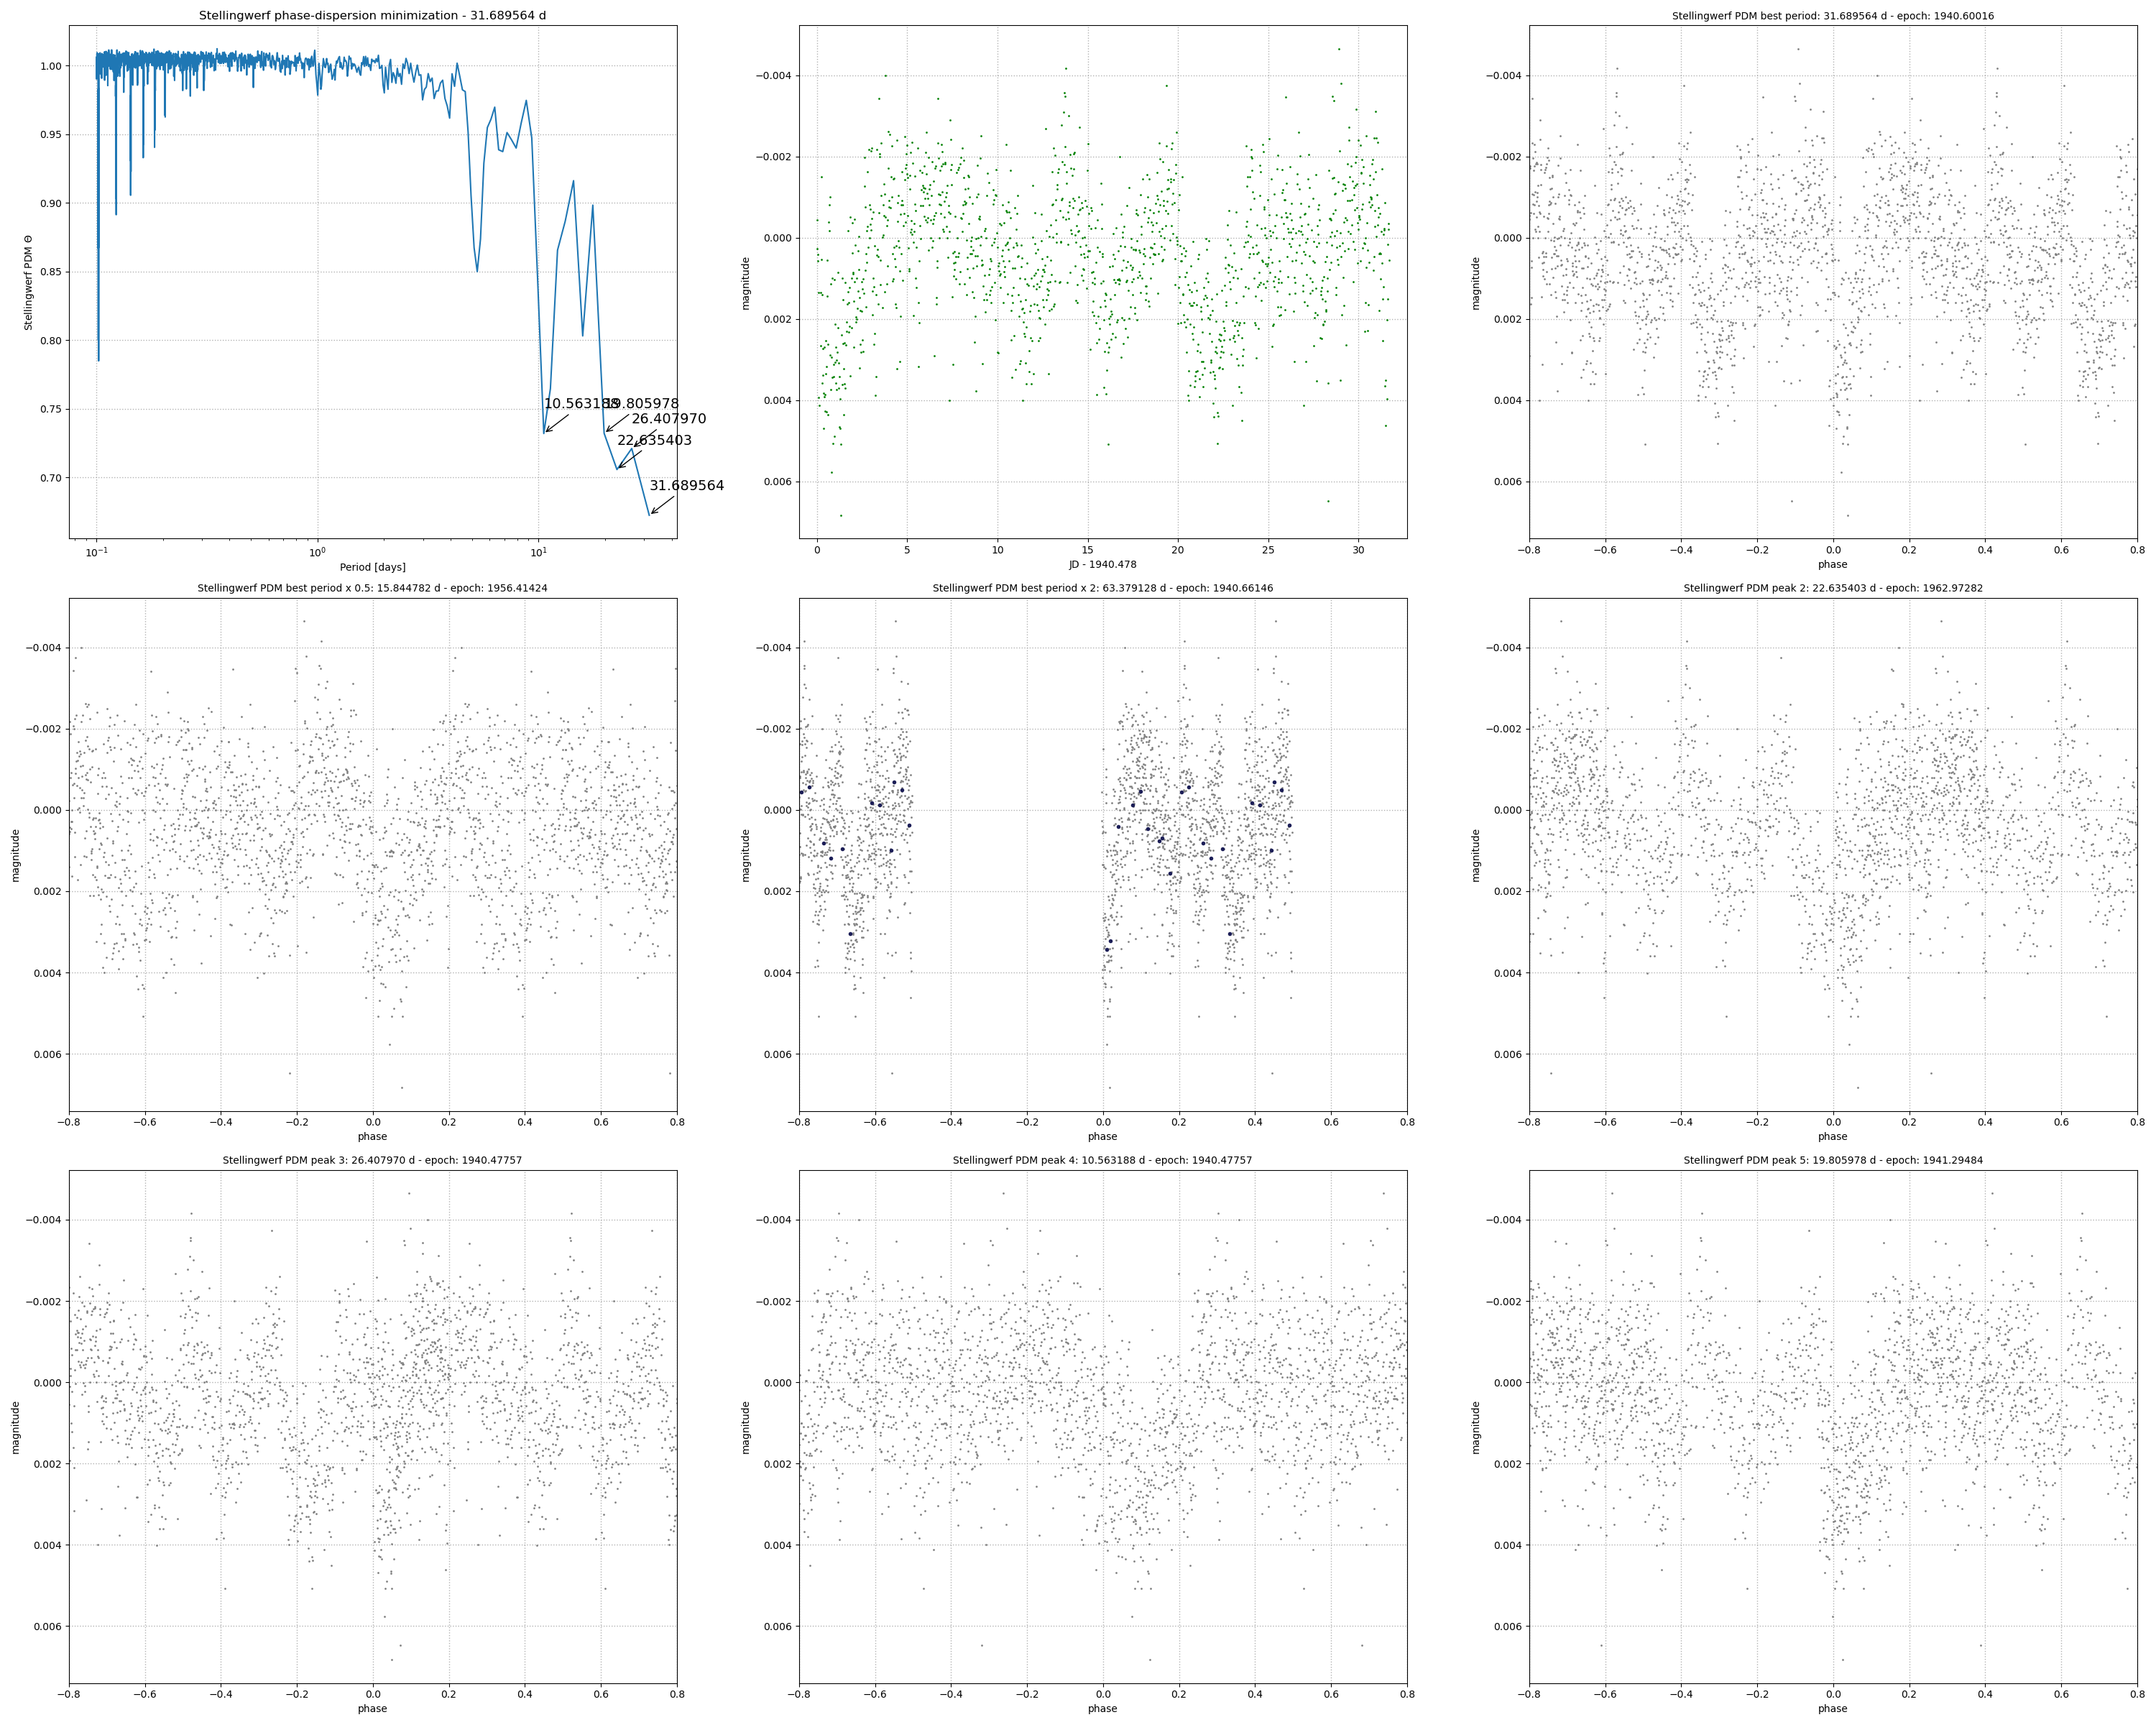

In [15]:
Image('0001158-checkplot-spdm.png')

In [16]:
print('PDM algorithm:',(spdm['nbestperiods']),'(days)')

PDM algorithm: [31.68956417000004, 22.635402978571456, 26.4079701416667, 10.563188056666679, 19.805977606250025] (days)
